In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [3]:
test1 = pd.read_csv('/home/enora/Documents/insa/IA/defi_IA-main/pricing_requests/pricing_requests_first_test.csv',sep=",")
# test2 = pd.read_csv('pricing_requests_test2.csv',sep=",")
# test3 = pd.read_csv('pricing_requests_test3.csv',sep=",")

In [4]:
file_list=['pricing_requests_test1.csv','pricing_requests_test2.csv','pricing_requests_test3.csv']
  
dataset = pd.DataFrame(pd.read_csv(file_list[0]))
  
for i in range(1,len(file_list)):
    data = pd.read_csv(file_list[i])
    df = pd.DataFrame(data)
    dataset = pd.concat([dataset,df])

FileNotFoundError: [Errno 2] No such file or directory: 'pricing_requests_test1.csv'

In [12]:
dataset.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,745,103,11,amsterdam,14,dutch,1,35122,Independant,Independant,0,0,0
1,788,108,0,amsterdam,14,dutch,1,35122,Independant,Independant,1,0,0
2,630,153,0,amsterdam,14,dutch,1,35122,Boss Western,J.Halliday Inn,0,0,0
3,375,105,4,amsterdam,14,dutch,1,35122,Independant,Independant,1,0,0
4,12,78,2,amsterdam,14,dutch,1,35122,Independant,Independant,0,0,0


<AxesSubplot:>

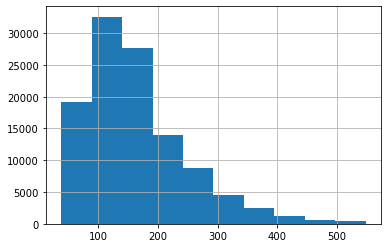

In [13]:
dataset['price'].hist()

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='stock', ylabel='price'>,
        <AxesSubplot:xlabel='date', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='stock'>,
        <AxesSubplot:xlabel='stock', ylabel='stock'>,
        <AxesSubplot:xlabel='date', ylabel='stock'>],
       [<AxesSubplot:xlabel='price', ylabel='date'>,
        <AxesSubplot:xlabel='stock', ylabel='date'>,
        <AxesSubplot:xlabel='date', ylabel='date'>]], dtype=object)

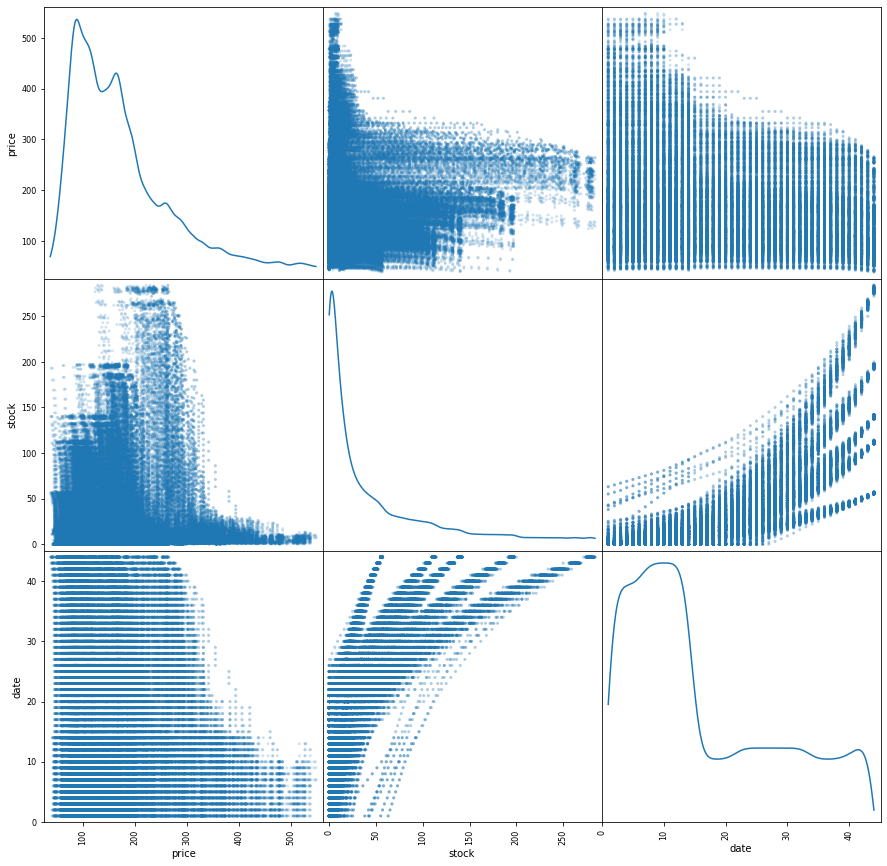

In [16]:
scatter_matrix(dataset[["price","stock","date"]], alpha=0.2, figsize=(15, 15), diagonal='kde')


### Extraction des échantillons apprentissage et test

In [26]:
dataset.dtypes

hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [23]:
# Variables explicatives

hotel_pricesDum = pd.get_dummies(dataset[["city","language","group","brand"]])
hotel_priceQuant=dataset[["hotel_id","stock","date","mobile","avatar_id","parking","pool","children_policy"]]
df = pd.concat([hotel_pricesDum,hotel_priceQuant],axis=1)
df.head()


,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,brand_Safitel,brand_Tripletree,hotel_id,stock,date,mobile,avatar_id,parking,pool,children_policy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,745,11,14,1,35122,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,788,0,14,1,35122,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,630,0,14,1,35122,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,375,4,14,1,35122,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,12,2,14,1,35122,0,0,0


In [24]:
# variable à expliquer

Yr=dataset["price"]

<AxesSubplot:>

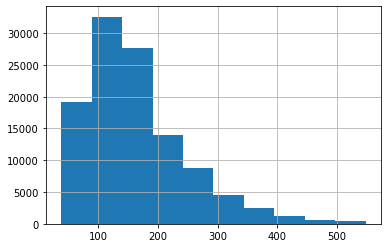

In [20]:
Yr.hist()

In [21]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Yr_train,Yr_test=train_test_split(df,Yr,test_size=0.1)

In [25]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  

Xr_test = scaler.transform(X_test)

### Forêts aléatoires

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestClassifier(n_estimators=100, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yr_train)
print(rfFit.oob_score_)

In [ ]:
rfFit.predict(X_test)